# Практическая работа №3: Статистический анализ социальных сетей.
Выполнила студентка гр. 0382 Андрющенко Ксения. Вариант №25

## Цель работы
Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей.

## Основные теоретические положения
**Диада**(dyad) - элемент сети, представляющий собой пару акторов и (возможную) связь между ними  
  
**Взаимная дида**: $D_{ij} = (1, 1)$  
**Асимметричная диада** $D_{ij} = (1, 0), D_{ij} = (0, 1)$  
**Нулевая диада** $D_{ij} = (0, 0)$  
**Цензус диад**(dyad census) - тройка чисел <M, A, N>, где:  
    - $M = \sum_{i<j} X_{ij} X_{ji}$  
    - $A = X_{++} - 2M$  
    - $N = \binom{g}{2} - A - M$  

**Индекс взаимности Каца-Пауэлла** — характеристикака измерения тенденции акторов в группе:  
    - $ \infty < \rho_{кр} \leqslant 1$.  
    - Индекс взаимности основан на ожидании кол-ва взаимн. диад, предполагая, что выбор делается акторами случайным образом.  
    - Вероятность взаимного выбора между любой произвольной парой акторов равна  
    $d^2/(g-1)^2$  
    - Вероятность того, что общая диада является взаимной:  
    $p(i → j ∩ j → i) = \frac{d}{(g-1)}(\frac{d}{(g-1)} + p_{kp}\frac{g-1-d}{g-1})$  
    - Оценка при свободном выборе   
    $p_{ekp}$ = $\frac{2(g-1)M - gd^2}{gd(g-1-d)}$  
    - Оценка при фиксированном выборе 
    
$p_{ekp}^\prime = \frac{2(g-1)^2M-L^2+L_2}{L(g-1)^2 -L^2 +L_2}$
    
**Индекс взаимности Бандиопадхьяйя** - данный индекс основан на минимальном и максимальном значениях количества взаимных диад.  
$\rho_{B} = \frac{M - M_{min}}{M_{max} - M_{min}}$,  
    Где:  
    - $M_{min} = max_{0 \leq t \leq g}f(t)$  
    - $M_{\max} = \lfloor 0.5 \sum^g_{i = 1} x_{i+} - \max g(t)\rfloor, 0 \leqslant t \leqslant g,$  
    - $f(t) = \sum_{i=1}^tx_{i+} - t(g-1) - C^2_t$  
    - $g(t) = \sum_{i=1}^tx_{i+} - t(t-1) - \sum_{i=t+1}^gmin(t, x_{i+})$  

**Оценка** $P$
    $P_{est} = \frac{\sum_{i=1}^g\sum_{j=1}^gx_{ij}}{g(g-1)}=\frac{l}{g(g-1)}$  


**Доверительный интервал**:
    $P_{lower} \leqslant P \leqslant P_{upper}$  
    $\hat{P}_{lower} = \displaystyle{\hat{P} - z_{\alpha/2} \sqrt\frac{\hat{P}(1- \hat{P})}{g(g-1)}}$  
    $\hat{P}_{lower} = \displaystyle{\hat{P} + z_{\alpha/2} \sqrt\frac{\hat{P}(1- \hat{P})}{g(g-1)}}$  
    Где $z_{\alpha/2}$ вычисляется из $\Phi(z_{\alpha/2}) = 0.5 - 0.5 \alpha$,  $\alpha - $ некоторый уровень значимости, $(1 - \alpha) - $ доверительная надёжность.  

**Нулевые гипотезы**
    $H_0: L \sim B(g(g-1), \frac{1}{2})$  
    $z_l = \frac{l - g(g-1)/2}{\sqrt{g(g-1)/4}}$  
    $H_0 : L \sim B(g(g-1), P_0)$  
    $z_l = \frac{l - g(g-1)P_0}{\sqrt{g(g-1)P_0(1-P_0)}}$  

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать

## Выполнение работы

In [2]:
library(igraph)

Warning message:
"пакет 'igraph' был собран под R версии 4.2.2"

Присоединяю пакет: 'igraph'


Следующие объекты скрыты от 'package:stats':

    decompose, spectrum


Следующий объект скрыт от 'package:base':

    union




### Пункт 1.
С помощью библиотеки igraph смоделировать случайный орграф
G𝑑 на основе модели Эрдеша—Реньи: G𝑑 = G (𝑔, 𝑝), где 𝑔 – количество акторов, 𝑝 – вероятность появления дуги между акторами. В R
для модели случайного графа Эрдеша—Реньи существует функция
erdos.renyi.game(). 

В соответствии с вариантом: 
* g = 61
* p = 0.56

**Модель Эрдёша-Реньи** — модель генерации случайных графов, в которой все графы с фиксированным набором вершин и фиксированным набором рёбер одинаково вероятны. 
Существует два тесно связанных варианта модели: 
* биномиальная 
* равномерная

**Функция erdos.renyi.game(g, p):**
*все возможные ребра создаются с одинаковой постоянной вероятностью*

* n - количество вершин в графе.
* p - вероятность рисования ребра между двумя произвольными вершинами.


In [3]:
g <- 61
p <- 0.56
graph <- erdos.renyi.game(g, p)

### Пункт 2
Отобразить полученный орграф.

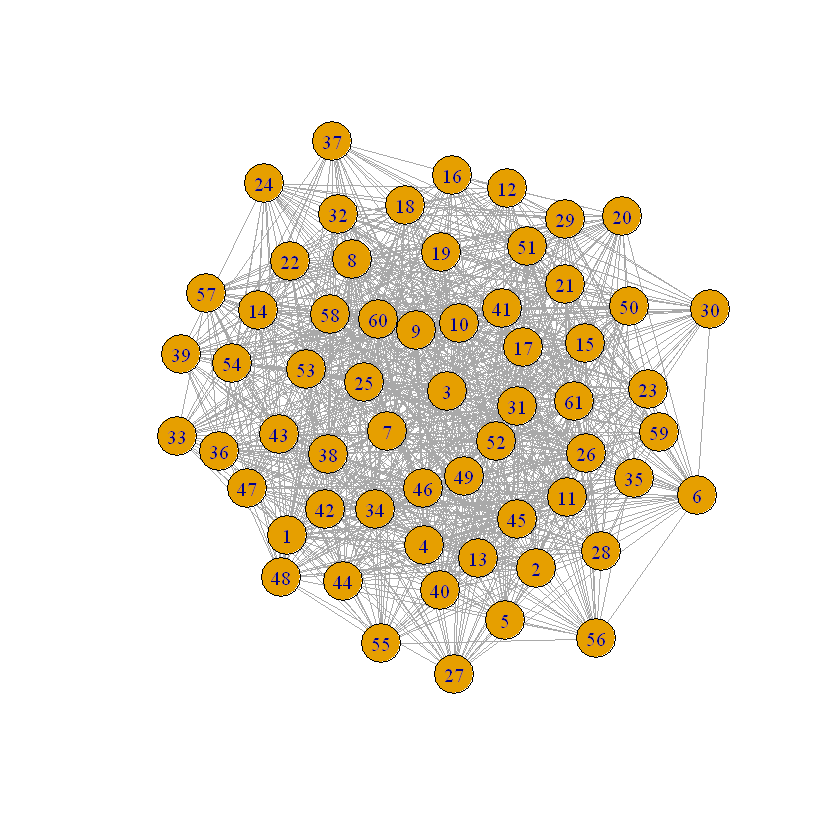

In [4]:
plot(graph)

### Пункт 3
Вычислить «пятичисловую сводку» для графа $\zeta$ 𝑑.

* Размер сети

In [5]:
gorder(graph) 

[1] 61

* Плотность сети

In [6]:
edge_density(graph)

[1] 0.5540984

* Число компонент

In [7]:
count_components(graph, mode='weak')

[1] 1

* Диаметр сети

In [8]:
diameter(graph, directed=FALSE)

[1] 2

* Коэффициент кластеризации

In [9]:
transitivity(graph)

[1] 0.5516523

### Пункт 4
Вычислить цензус диад. Сделать выводы.

Вывод функции dyad_census(graph):
* mut - количество пар со взаимными связями.
* asym - количество пар с невзаимными связями.
* null - количество пар без связи между ними.

In [10]:
dyad.census(graph)

$mut
[1] 1014

$asym
[1] 0

$null
[1] 816

**Вывод**: 
* количество пар со взаимными связями - 1014
* количество пар с невзаимными связями - 0
* количество пар без связи между ними - 816

Граф не является полным, т.к. есть пары вершин без связи между ними. Граф неориентированный, в силу отсутствия пар с невзаимными связями.

### Пункт 5.
Вычислить оценку индекса взаимности Каца—Пауэла при фиксированом выборе акторов 𝑑 и при свободном выборе. Сделать выводы.

Пусть, $d$ = 25, выбор делается из $(g - 1)$ = 60 акторов.


In [24]:
# Для фиксированного выбора из d акторов
d <- 19
g <- 61
M <- dyad.census(graph)$mut
p_fix <- (2*(g-1)*M - g * d^2)/(g*d*(g - 1 - d))
p_fix
# Оценка при свободном выборе (по методу моментов оценка)
graph_matrix <- as.matrix(as_adjacency_matrix(graph))
L <- sum(rowSums(graph_matrix))
L_2 <- sum(rowSums(graph_matrix)^2)
p_free <- (2*(g - 1)^2 * M - L^2 + L_2)/(L*(g - 1)^2 - L^2 + L_2)
p_free

[1] 2.097245

[1] 1

**Вывод**: при фикисрованном выборе акторы создают взаимных связей больше, чем при свободном.

### Пункт 6.
Вычислить вероятность того, что связь будет взаимной для каждого случая.

In [68]:
# Фиксированный выбор
p_mut_fix <- (d/(g-1)) * ((d/(g-1)) + p_fix*(g - 1 - d)/(g - 1))
p_mut_fix

# Свободный выбор
p_mut_free <- (rowSums(graph_matrix)*colSums(graph_matrix))/(g - 1)^2
p_mut_free <- sum(p_mut_free)/g
p_mut_free

[1] 0.5540984

[1] 0.3110109

### Пункт 7.
Вычислить индекс взаимности Бандиопадхьяйя. Сделать выводы.

In [83]:
str_sum <- rowSums(graph_matrix)
g <- 61



g_func <- function(str_sum, g, t) {
    g_sum <- sum(row_sum[1:t])
    min_g <- 0   
    for (i in (t+1):g) {
        min_g <- min_g + min(c(t, str_sum[i]))
    }
    g_step <- g_sum - t*(t-1) - min_g
    g_step
}

f_func <- function(str_sum, g, t) {
    g_sum <- sum(row_sum[1:t])
    C_g_2 <- factorial(t)/(factorial(2) * factorial(t-2))
    f_step <- g_sum - t*(g-1) - C_g_2 
    f_step
}

g_t <- rep(2, g - 1)
for (t in 2:(g-1)) {
    g_t[t] <- g_func(row_sum, g, t)
}

f_t <- rep(2, g)
for (t in 2:g) {
    f_t[t] <- f_func(row_sum, g, t)
}


M_max <- floor(0.5 * sum(str_sum[1:g]) - max(g_res))

M_min <- max(f_res)

p_b <- (M - M_min)/(M_max - M_min)
p_b

[1] 1.00198

**Вывод:** согласно полученному значению индекса акторы довольно склонны образовывать взаимные связи.

### Пункт 8.
Проверить нулевую гипотезу о том, что число дуг 𝐿 в орграфе
G𝑑 имеет биномиальное распределение 𝐿 ∼ Bin(𝑔(𝑔 − 1), 1/2) при
уровне значимости 𝛼 = 0.01. Определить максимальный уровень значимости при котором нулевая гипотеза не отвергается.

In [61]:
a <- 0.01
sum_graph <- sum(graph_matrix)
stat <- (sum_graph - g * (g - 1) / 2) / (g * (g - 1) / 4) ** (1 / 2)
p_value <- 0.5 - 0.5*pnorm(stat)
cat("Статистика критерия: ", stat,"\n")
cat("Максимальный уровень значимости: ", p_value,"\n")
cat(p_value >= a/2,"\n")
#p <- 1/2
#binom.test(sum_graph, g*(g-1), p)


Статистика критерия:  6.545678 
Максимальный уровень значимости:  1.480649e-11 
FALSE 


**Вывод**:Максимальный уровень значимости, при котором гипотеза не отвергается - p-value:
1.480649e-11.
p-value меньше $a$, следовательно, нулевая гипотеза не выполняется и вероятность построения ребра между любыми двумя акторами не равна 1/2.

### Пункт 9.
Проверить нулевую гипотезу о том, что число дуг 𝐿 в орграфе G𝑑
имеет биномиальное распределение 𝐿 ∼ Bin(𝑔(𝑔−1), 𝑃0) при уровне
значимости 𝛼. Определить максимальный уровень значимости при
котором нулевая гипотеза не отвергается.
P0 = 0.66

In [57]:
P_0 <- 0.66
stat <- (sum(graph_matrix) - P_0*g * (g - 1)) / (g * (g - 1)*P_0*(1-P_0)) ** (1 / 2)
p_value <- 0.5 - 0.5*pnorm(stat)
cat("Статистика критерия: ", stat ,"\n")
cat("Максимальный уровень значимости: ", p_value ,"\n") 
cat( p_value >= a/2,"\n")


	Exact binomial test

data:  sum_graph and g * (g - 1)
number of successes = 2028, number of trials = 3660, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.66
95 percent confidence interval:
 0.5378204 0.5702898
sample estimates:
probability of success 
             0.5540984 


Статистика критерия:  -13.52483 
Максимальный уровень значимости:  0.5 
TRUE 


**Вывод**: Видим, что p-value > $a/2$, значит, нулевая гипотеза выполняется. Максимальный уровень значимости, при котором гиптеза не отвергается: p-value = 0.5

### Пункт 10.
Построить доверительный интервал для оценки параметра 𝑝 с доверительной надёжностью (1 − 𝛼). Сделать выводы.

In [53]:
# Оценим параметр p 
param <- sum(graph_matrix)/(g*(g-1))
cat("Оценка параметра p: ", param, "\n")
za_2 <- abs(qnorm(a/2))
# Доверительный интервал
p_l <- param - za_2 * sqrt((param * (1 - param))/(g * (g - 1)))
p_u <- param + za_2 * sqrt((param * (1 - param))/(g * (g - 1)))
cat("Доверительный интервал:")
p_l
p_u

Оценка параметра p:  0.5540984 
Доверительный интервал:

[1] 0.5329348

[1] 0.575262

**Вывод**: Полученный доверительный интервал равен 0.53 $<= p <=$ 0.58. Так как исходное $p$ = 0.55, то следует вывод, что данный доверительный интервал высчитан верно с доверительной надежностью (1 - 0.02).

## Выводы
С использованием библиотеки 'igraph' в ходе работы была сгенерирована случайная сеть с помощью Модели Эрдёша-Реньи, и затем к ней были применены методы статисистического анализа. В ходе работы использовались лишь основы статистического анализа, однако их можно использовать для реальных данных, и на его основании делать выводы о процессах, происходящих в исследуемых данныхсмоделированного случайным образом ориентированного графа. Произведена проверка на верность вычисленных значений, большинство из которых сходится с данным в условии значением. Все данные, полученные в ходе анализа указаны в промежуточных выводах.